## Introduction:

In the realm of modern healthcare, medical insurance plays a vital role in providing financial security and access to essential healthcare services for individuals and their families. The cost of medical insurance is influenced by a multitude of factors, including age, gender, BMI (Body Mass Index), smoking habits, region of residence, and other health-related attributes. Predicting the medical insurance cost accurately can significantly benefit insurance companies by streamlining pricing strategies and providing prospective clients with more precise premium estimates.

In this machine learning project, we aim to develop an automatic system that can predict the medical insurance cost for an individual based on their relevant attributes. By leveraging a dataset of historical medical insurance records, we will employ various machine learning methods to build a predictive model. This model will enable the insurance company to estimate insurance costs effectively and enhance decision-making processes related to insurance premiums.


### Objectives:

The primary objective of this machine learning project is to create a robust and accurate predictive model that can forecast the medical insurance cost for individuals. 

The project's objectives is aim to equip the insurance company with an automated tool that enables more accurate and transparent medical insurance cost estimation. This will not only benefit the company in optimizing pricing strategies but also enhance customer satisfaction by providing potential clients with personalized and reliable insurance premium estimates.


#### Summarized Workflow for Medical Insurance Cost Prediction Project:

Data Collection: Gather a comprehensive dataset containing historical medical insurance records, including attributes such as age, gender, BMI, smoking habits, region of residence, and medical insurance cost.

Data Analysis: Conduct exploratory data analysis (EDA) to gain insights into the dataset's structure, distribution, and relationships between different attributes. Identify any patterns or trends that could influence medical insurance costs.

Data Pre-processing: Cleanse the dataset by handling missing values, dealing with outliers, and addressing any data inconsistencies. Transform categorical variables into numerical representations using techniques like one-hot encoding.

Train-Test Split: Divide the pre-processed dataset into training and testing subsets. The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance.

Linear Regression Model: Choose linear regression as the initial predictive model for medical insurance cost prediction due to its simplicity and interpretability. Implement the linear regression algorithm using appropriate libraries in Python.

Train the Linear Regression Model: Fit the linear regression model to the training data to learn the relationship between the input attributes and the target variable (medical insurance cost). The model will learn the coefficients for each feature during this training process.

In [1]:
import numpy as np
import pandas as pd                  # use to manipulate and analyze data efficiently using data structures like DataFrames
import matplotlib.pyplot as plt      # use to visualize data and model results through various plots and charts
import seaborn as sns                # use to create visually appealing and informative statistical data visualizations

from sklearn.model_selection import train_test_split     # is to split the dataset into separate training and testing subsets, 
                                                         #allowing the model to be trained on one part and evaluated on another 
                                                         # to assess its performance accurately.
    
from sklearn.linear_model import LinearRegression        # is to bring in the Linear Regression algorithm from a library, 
                                                         # enabling the creation of a linear regression model for predictive 
                                                         # analysis.
    
from sklearn import metrics                              # is used to calculate and evaluate various performance metrics, 
                                                         # such as accuracy, precision, recall, and F1-score, to assess the 
                                                         # effectiveness of machine learning models.

### Data Collection & Analysis

In [2]:
in_dt = pd.read_csv('Health_insurance.csv')

In [4]:
in_dt.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
in_dt.shape             # no of rows and columns

(1338, 7)

In [23]:
in_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

Sex

Smoker

Region


In [6]:
in_dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
in_dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Bhabani Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


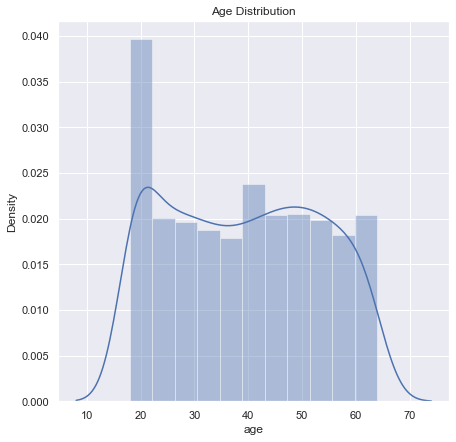

In [9]:
# distribution of age value

sns.set()
plt.figure(figsize=(7,7))
sns.distplot(in_dt['age'])
plt.title('Age Distribution')
plt.show()


From this graph we see that most of the peoples are in range of 18-22 years.

Rest of all age group peoples have almost same numbers.

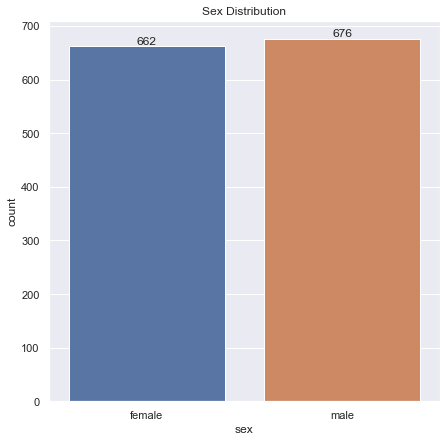

In [11]:
# Gender column

plt.figure(figsize=(7,7))
ax=sns.countplot(x='sex', data= in_dt)
plt.title('Sex Distribution')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

There are almost same numbers of both male and female in the given dataset.

C:\Users\Bhabani Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


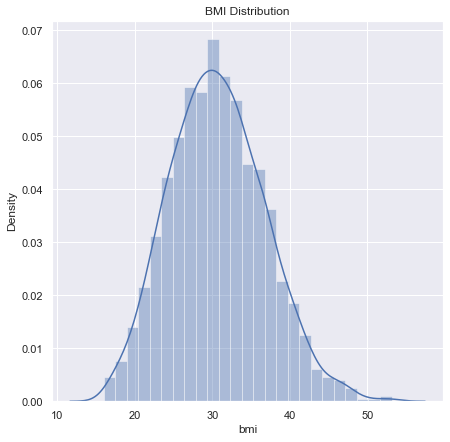

In [14]:
# bmi distribution

plt.figure(figsize=(7,7))
sns.distplot(in_dt['bmi'])
plt.title('BMI Distribution')
plt.show()

This is a normal distribution of bmi. 

Normal BMI Range --> 18.5 to 24.9

But in this figure bmi of 25-35 range has highest density. That may be affected the insurance cost of a person.

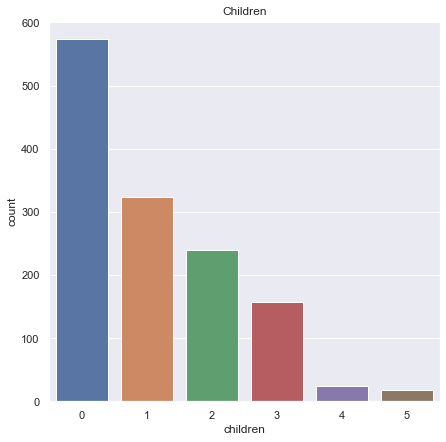

In [16]:
# children column

plt.figure(figsize=(7,7))
sns.countplot(x='children', data= in_dt)
plt.title('Children')
plt.show()

In [18]:
in_dt['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

From this figure we find that most of people doesn't have children.

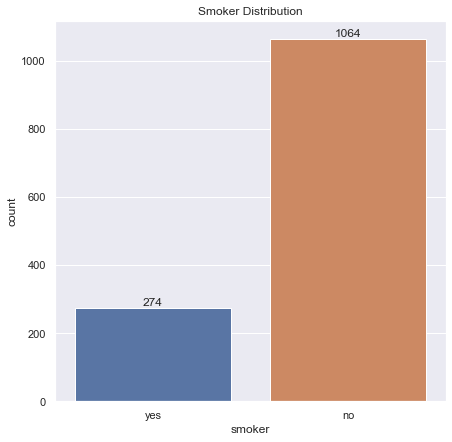

In [20]:
# smoker column

plt.figure(figsize=(7,7))
ax=sns.countplot(x='smoker', data= in_dt)
plt.title('Smoker Distribution')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In the given dataset most of peoples are non smoker.

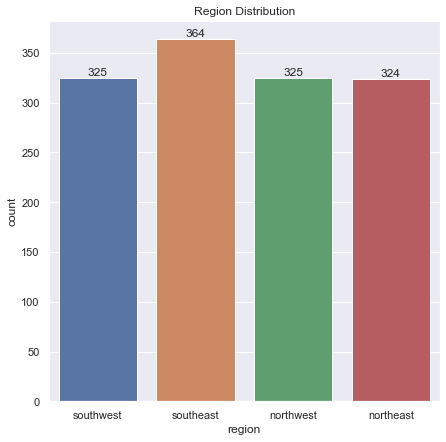

In [21]:
# region column

plt.figure(figsize=(7,7))
ax=sns.countplot(x='region', data= in_dt)
plt.title('Region Distribution')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From this figure we found that most of the people in the dataset are from southeast region and same number of peoples are from southwest and northwest region. 

C:\Users\Bhabani Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


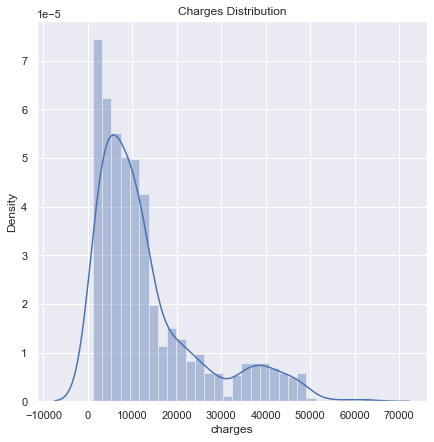

In [23]:
# distribution of charges value

plt.figure(figsize=(7,7))
sns.distplot(in_dt['charges'])
plt.title('Charges Distribution')
plt.show()

Most of the charges are in the range of 2000 to 10000.

### Data Preprocessing

#### Encoding the categorical features

We have three categorical columns in the dataset that are 'sex', 'smoker' and 'region'. We can't feed them into our machine learning models as computer doesn't understand the text value. So we have to convert it into numerical value. This process is called 'encoding'.

In [6]:
# encoding sex column
in_dt.replace({'sex':{'male':0, 'female':1}}, inplace=True)


# encoding 'smoker' column
in_dt.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)


# encoding 'region' column
in_dt.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [7]:
in_dt.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


### Splitting the Features and Target

In machine learning, we split the features and target column to train the model on the input data (features) and predict the output (target) separately. This helps the model learn and make accurate predictions based on the patterns and relationships between the features and the target variable.

In the dataset 'age', 'sex', 'bmi', 'children', 'smoker', 'region' are features columns and 'charges' column is target column.

In [12]:
X= in_dt.drop(columns='charges', axis = 1)
Y= in_dt['charges']

In [13]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [14]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#### Splitting the data into Training data & Testing Data

Splitting the data into training and testing sets allows us to train the machine learning model on one portion of the data (training data) and then check its performance on unseen data (testing data) to ensure it can generalize well and make accurate predictions for new, unseen examples.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


# we are splitting the dataset into two parts: X_train and Y_train, which will be used for training the machine learning model,
#  and X_test and Y_test, which will be used to evaluate the model's performance. The 'test_size=0.2' indicates that 20% of 
#  the data will be allocated for testing and 80% of the data will be the training data, while 'random_state=2' ensures that
#  the data split remains consistent whenever we run the code with the same random state value


print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Linear Regression Model

In [19]:
# loading the Linear Regression model

regressor= LinearRegression()

In [21]:
regressor.fit(X_train, Y_train)


# we are training the regressor (machine learning model) using the training data (X_train and Y_train), allowing it to learn 
#   from the input features (X_train) and their corresponding target values (Y_train).

LinearRegression()

#### Model evaluation

In [22]:
# Prediction on training data

training_data_prediction=regressor.predict(X_train)

# In this query, the machine learning model (regressor) predicts the target variable (Y) for the training data (X_train), 
# and the results are stored in the variable 'training_data_prediction.'

In [24]:
# R square value

R2_train= metrics.r2_score(Y_train, training_data_prediction)
print('R square value:', R2_train)

R square value: 0.751505643411174


We calculate the R-squared (R2) score, a metric that measures how well the machine learning model's predictions (training_data_prediction) align with the actual target values (Y_train) for the training data. 

The R2 score indicates the percentage of the variance in the target variable that is explained by the model's predictions, with higher values (closer to 1) indicating a better fit.

In [27]:
# Prediction on testing data

testing_data_prediction=regressor.predict(X_test)


# In this query, the machine learning model (regressor) predicts the target variable for the testing data (X_test), 
# and the results are stored in the variable 'testing_data_prediction.' These predictions will be used to evaluate the
# model's performance on unseen data.

In [29]:
# R squared value

R2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R square value:', R2_test)

R square value: 0.7447273869684077


Calculating both the R-squared (R2) values for training data and testing data is necessary to assess how well the machine learning model performs on both the data it was trained on and on new, unseen data.

1)- R2 for Training Data: It tells us how well the model fits the training data and indicates the percentage of variance in the target variable that the model explains using the training data.

2)- R2 for Testing Data: It measures how well the model generalizes to new, unseen data. If the R2 score for testing data is significantly lower than that of training data, it suggests that the model may be overfitting to the training data and may not perform well on new data.

By comparing the R2 scores for both datasets, we can understand if the model is adequately capturing the patterns in the data without memorizing the training data and can make reliable predictions on unseen data.

### Building a Predictive System

In [32]:
input_data=(46,1,33.44,1,1,0)

# changing the input_data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)

print(prediction)
print('The insurance cost is ', prediction[0])

[10657.40884992]
The insurance cost is  10657.408849921463


C:\Users\Bhabani Sankar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1) np.asarray(input_data): The input data is converted into a NumPy array, which is a data structure widely used in Python for numerical computations.

2) input_data_as_numpy_array.reshape(1, -1): The array is reshaped into a format suitable for prediction. The -1 in the reshape function means that the number of columns is automatically inferred based on the input data's size, while 1 indicates that the data will be treated as a single sample.

3) regressor.predict(input_data_reshaped): The trained regression model (regressor) predicts the medical insurance cost using the reshaped input data.

4) print(prediction): The prediction, which is the estimated insurance cost, is printed.

5) print('The insurance cost is ', prediction[0]): The final output is printed in a human-readable format, stating the predicted insurance cost for the provided input data.



### Conclusion

  This machine learning project successfully developed an automatic system that predicts medical insurance costs based on various attributes. By training and evaluating the model on historical data, we can now provide accurate and personalized insurance cost estimates to potential clients, improving decision-making for the insurance company and enhancing customer satisfaction. This predictive system proves to be a valuable tool for the insurance industry, streamlining pricing strategies and offering more reliable insurance premium estimates to individuals and their families.